In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('physic.csv')

data['Label'] = np.int32(data['Label'] == 's')

y = data['Label']
X = data.drop('Label', axis=1)

data.head()

,EventId,Label,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,PRI_jet_num
0,100001,0,160.937,68.768,103.235,48.146,1
1,100002,0,-999.000,162.172,125.953,35.635,1
2,100003,0,143.905,81.417,80.943,0.414,0
3,100004,0,175.864,16.915,134.805,16.405,0
4,100005,0,89.744,13.550,59.149,116.344,3


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(min_samples_leaf=20, max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

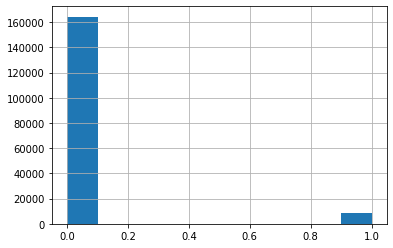

In [27]:
data['Label'].hist()

In [55]:
# normal model accuracy (no regularization)
from sklearn.metrics import accuracy_score

# predicted = tree.predict(X_test)
predicted = tree.predict_proba(X_test)[:, 1] >= 0.3
y_predicted_train = tree.predict(X_train)

print('Train:', accuracy_score(y_train, y_predicted_train))
print('Test:', accuracy_score(y_test, predicted))

Train: 0.951818574780783
Test: 0.9301146231330323


In [50]:
TP = ((y_test == predicted) & (predicted == True)).sum()
FP = ((y_test != predicted) & (predicted == True)).sum()
TN = ((y_test == predicted) & (predicted == False)).sum()
FN = ((y_test != predicted) & (predicted == False)).sum()

print(TP, ' | ', FN)
print('-' * 10)
print(FP, ' | ', TN)

355  |  1801
----------
513  |  40516


In [40]:
print('presicion', TP / (TP + FP))
print('recall', TP / (TP + FN))

presicion 0.3076923076923077
recall 0.0037105751391465678


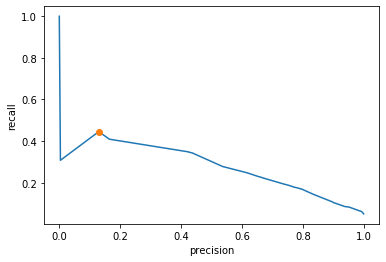

In [58]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, threshold = precision_recall_curve(y_test, tree.predict_proba(X_test)[:, 1])
min_threshold = np.argmin((threshold - 0.5) ** 2)

plt.plot(recall, precision)
plt.plot(recall[min_threshold], precision[min_threshold], 'o')
plt.xlabel('precision')
plt.ylabel('recall')

Text(0, 0.5, 'False Positive Rate')

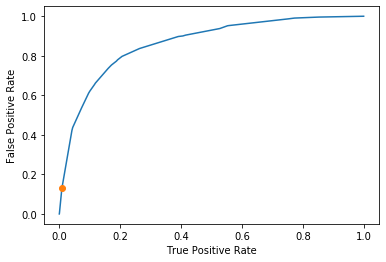

In [62]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])
min_threshold = np.argmin((threshold - 0.5) ** 2)

plt.plot(fpr, tpr)
plt.plot(fpr[min_threshold], tpr[min_threshold], 'o')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

In [59]:
threshold

array([0.00198244, 0.00279748, 0.00831758, 0.00839788, 0.0094518 ,
       0.01347118, 0.01563148, 0.0159292 , 0.02102426, 0.02538234,
       0.03812561, 0.04482759, 0.04761905, 0.04996837, 0.05847953,
       0.0595843 , 0.0613621 , 0.06880477, 0.06930693, 0.08411215,
       0.09069549, 0.14877589, 0.14989672, 0.15236511, 0.25868726,
       0.27272727, 0.28754282, 0.33333333, 0.37037037, 0.46693273,
       0.54054054])

In [42]:
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [44]:
tree.predict_proba(X_test)

array([[0.99801756, 0.00198244],
       [0.98436852, 0.01563148],
       [0.99720252, 0.00279748],
       ...,
       [0.99160212, 0.00839788],
       [0.95003163, 0.04996837],
       [0.99801756, 0.00198244]])